<a href="https://colab.research.google.com/github/IrfhanAhmedh/Reservoir-Simulator-1D-2D-/blob/main/1D_Implicit_Homogeneous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

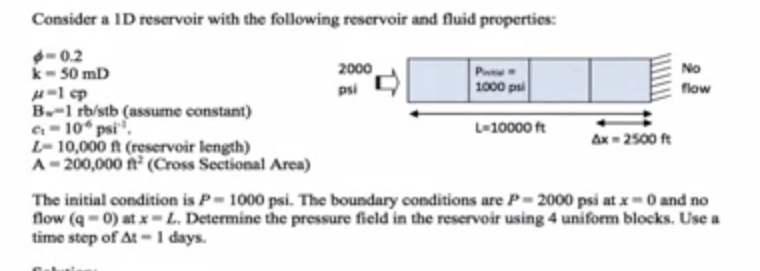

**USING IMPLICIT METHOD**  (Homogenous System)

In [ ]:
a=200000   
l=10000   
h=2500     
dx=2500   
ct=10**-6  
bw=1
pie=0.2
k=50
mu=1
Pb=2000  #pressure at left boundary
dt=1 

In [ ]:
#Transmissibility 
T=k*a/(mu*bw*dx)   # md-ft/cp
print(T)

4000.0


In [ ]:
#Accumulation
bi=a*h*pie*ct  #ft3/psi
print(bi)

100.0


In [ ]:
import numpy as np
Tmat=np.arange(16).reshape(4,4)*0
Tmat=Tmat.astype(float)
Tmat[0][0]=3*T  #left side dirchlet
Tmat[3][3]=T    #right side newman
print(Tmat)

[[12000.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.  4000.]]


In [ ]:
for i in range (1,3):
 Tmat[i][i]=2*T
for i in range(3):
 Tmat[i][i+1]=-T
 Tmat[i+1][i]=-T

In [ ]:
Tmat

array([[12000., -4000.,     0.,     0.],
       [-4000.,  8000., -4000.,     0.],
       [    0., -4000.,  8000., -4000.],
       [    0.,     0., -4000.,  4000.]])

In [ ]:
Tmat=Tmat*6.33*10**-3

In [ ]:
Tmat

array([[ 75.96, -25.32,   0.  ,   0.  ],
       [-25.32,  50.64, -25.32,   0.  ],
       [  0.  , -25.32,  50.64, -25.32],
       [  0.  ,   0.  , -25.32,  25.32]])

In [ ]:
#Intial condition
pi=np.arange(4).reshape(4,1)*0+1000
pi

array([[1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
Q=np.arange(4).reshape(4,1)*0
Q[0][0]=2*pb*T  #md-ft-psi/cp
Q=Q*6.33*10**-3 #ft3/day
Q  

array([[101280.],
       [     0.],
       [     0.],
       [     0.]])

In [ ]:
B=np.arange(16).reshape(4,4)*0
for i in range(4):
 B[i][i]=bi
print(B)


[[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]


In [ ]:
for t in range(1,4):
 a=Tmat+(B/dt)
 b=(B/dt)@pi+Q
 pn1=np.linalg.solve(a,b)
 pi=pn1
 print('At Time =',t,'Days')
 print(pn1.reshape(1,4))

At Time = 1 Days
[[1295.14629436 1051.10355276 1008.89158828 1001.79648113]]
At Time = 2 Days
[[1472.48672854 1117.85684509 1026.86555692 1006.86150666]]
At Time = 3 Days
[[1582.91646538 1184.88579757 1051.58243023 1015.89704595]]


**The Results are matching with CMG simulator since CMG also uses Implicit Method**